# U.S. Medical Insurance Costs

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import iqr
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("insurance.csv")


average and std of ages of people in this survey:  39.20702541106129 14.044709038954522 

95% of people in this survey are between 11.117607333152243 and 67.29644348897034 years old:  

The youngest person is 18 years old
The oldest person is 64 years old


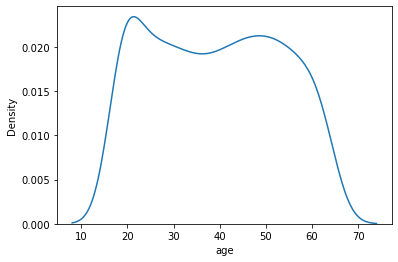

In [2]:
age_average = np.mean(df.age)
age_std = np.std(df.age)
print("average and std of ages of people in this survey: " , age_average , age_std, "\n")
print("95% of people in this survey are between {0} and {1} years old: "\
      .format( age_average - 2*age_std , age_average + 2*age_std) , "\n")

print("The youngest person is {0} years old".format(np.min(df.age)) )
print("The oldest person is {0} years old".format(np.max(df.age)) )
sns.kdeplot(df.age)
plt.show()



1338 people participated in this survey, which 662 number of them are female(49.48 percentage) and 676 of them are male (50.52 percentage ) 

      sex        age
0  female  39.503021
1    male  38.917160 



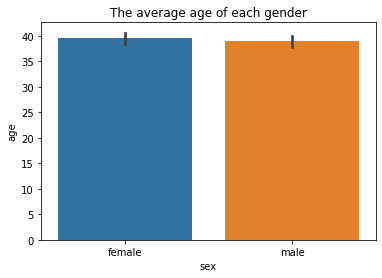

In [3]:

print("{0} people participated in this survey, which {1} number of them are female\
({2:.2f} percentage) and {3} of them are male ({4:.2f} percentage )\
".format(len(df), len(df[df.sex == "female"]), 100 * len(df[df.sex == "female"])/len(df),\
         len(df[df.sex == "male"]), 100 * len(df[df.sex == "male"])/len(df) ), "\n")


print(df.groupby("sex").age.mean().reset_index(), "\n")
plt.title("The average age of each gender")
sns.barplot(data = df, x = "sex", y = "age" )
plt.show()


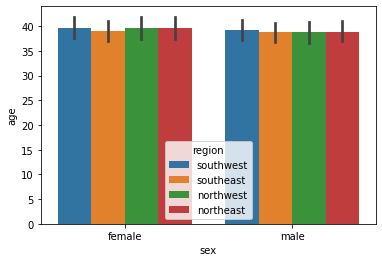

In [4]:
sns.barplot(data = df, x = "sex", y = "age", hue = "region")
plt.show()

The number of smoker in each gender:
smoker   no  yes  smoker_percent
sex                             
female  547  115        0.173716
male    517  159        0.235207


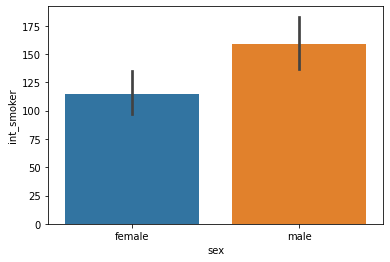

In [16]:
print("The number of smoker in each gender:")
sex_smoker_df = df.groupby(["sex" , "smoker"]).age.count().reset_index()
sex_smoker_df.rename(columns = {"age" : "count"}, inplace = True)

sex_smoker_pivot = sex_smoker_df.pivot(index = "sex", columns = "smoker", values = "count")
sex_smoker_pivot["smoker_percent"] = sex_smoker_pivot["yes"] / ( sex_smoker_pivot["yes"] +  sex_smoker_pivot["no"])
print(sex_smoker_pivot)

df['int_smoker'] = df.smoker.apply(lambda x:1 if x=="yes" else 0)

sns.barplot(data = df, x = "sex", y = "int_smoker", estimator = np.sum )
plt.show()

The average cost of each gender: 
      sex       charges
0  female  12569.578844
1    male  13956.751178


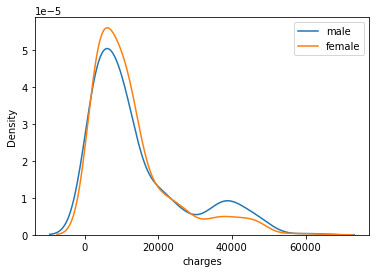

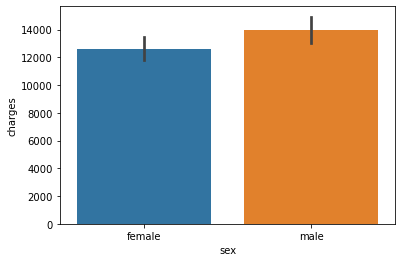

In [19]:
print("The average cost of each gender: ")
print(df.groupby("sex").charges.mean().reset_index())
male_charges = df[df.sex == "male"].charges
female_charges = df[df.sex == "female"].charges
sns.kdeplot(male_charges)
sns.kdeplot(female_charges)
plt.legend(["male", "female"])
plt.show()

sns.barplot(data= df, x = "sex" , y = "charges")
plt.show()

The average cost in each region: 
      region       charges
0  northeast  13406.384516
1  northwest  12417.575374
2  southeast  14735.411438
3  southwest  12346.937377


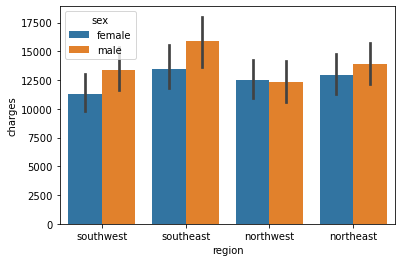

In [18]:
print("The average cost in each region: ")
print(df.groupby("region").charges.mean().reset_index())
sns.barplot(data = df, x = "region", y = "charges", hue = "sex")
plt.show()

  smoker       charges
0     no   8434.268298
1    yes  32050.231832


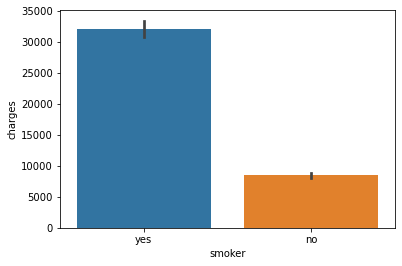

In [17]:
print(df.groupby("smoker").charges.mean().reset_index())
sns.barplot(data = df, x = "smoker", y = "charges")
plt.show()

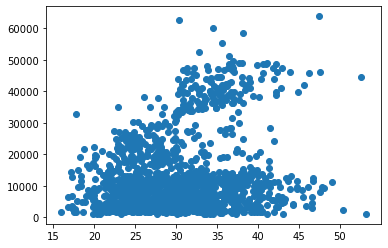

In [9]:
plt.scatter(df.bmi, df.charges)
plt.show()

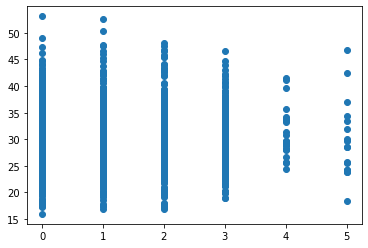

In [10]:
plt.scatter(df.children, df.bmi)
plt.show()

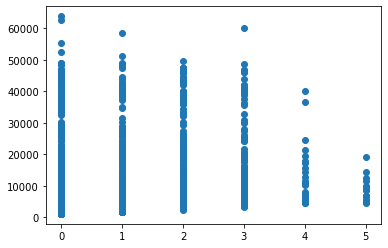

In [11]:
plt.scatter(df.children, df.charges)
plt.show()

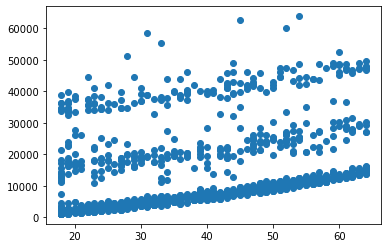

In [12]:
plt.scatter(df.age, df.charges)
plt.show()

In [13]:
print("The yearly average cost of patients is :" , np.mean(df.charges))

The yearly average cost of patients is : 13270.422265141257


In [14]:
print(set(df.region))

{'southeast', 'northeast', 'northwest', 'southwest'}


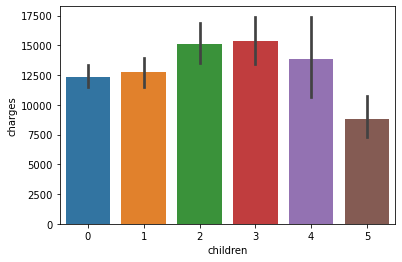

In [16]:
sns.barplot(data = df , x = "children", y = "charges")
plt.show()